# Disclaimer: 
Anyone who are seeing this notebook, find anything that can be improved please let me know via below mentioned links

# About


Name: Dristanta Das 

LinkedIn: https://www.linkedin.com/in/dasdristanta13/ 

Github:  https://github.com/dasdristanta13 

Gmail:  dasdristanta13@gmail.com

# Imports

In [1]:
import jax
from jax import jacfwd, jacrev
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
def convergence_rate(x):
    l = []
    for i in range(1, len(x) - 1):
        val = np.linalg.norm(x[i + 1] - x[i]) / np.linalg.norm(x[i] - x[i - 1])
        l.append(val)
    return l

# Purturbed Gradient Descent

## Piece Wise Update

In [3]:
# Fixed Constant Step size


def StochGD_Con_Step(f, start, learn_rate, e=10e-5):
    ans = {}
    vec = [start]
    lr = [learn_rate]
    v = start
    noise = np.random.randn(2)
    grad = jacfwd(f)
    diff = -learn_rate * (grad(v) + noise)
    v += diff
    vec.append(np.array(v))
    if f(vec[-1]) > f(vec[-2]):
        learn_rate /= 2
    lr.append(learn_rate)
    while np.abs(f(vec[-1]) - f(vec[-2])) > e:
        diff = -learn_rate * (grad(v) + noise)
        v += diff
        vec.append(np.array(v))
        if f(vec[-1]) > f(vec[-2]):
            learn_rate /= 2
        lr.append(learn_rate)
    ans["x"] = vec
    ans["f(x)"] = [f(x) for x in vec]
    ans['Learning Rate'] = lr
    return pd.DataFrame(ans)

## Exponential Decay

In [4]:
# Exponential decay


def StochGD_ExD_Step(f, start, lamda, learn_rate_main, e=10e-5):
    ans = {}
    lrmain=learn_rate_main
    lr = [learn_rate_main]
    vec = [list(start)]
    v = start
    noise = np.random.randn(2)
    grad = jacfwd(f)
    learn_rate =lrmain* np.exp(-lamda * (len(vec)))
    diff = -learn_rate * (grad(v) + noise)
    v += diff
    lr.append(learn_rate)
    vec.append(np.array(v))
    while np.abs(f(vec[-1]) - f(vec[-2])) > e:
        learn_rate = lrmain* np.exp(-lamda * (len(vec)))
        diff = -learn_rate * (grad(v) + noise)
        v += diff
        lr.append(learn_rate)
        vec.append(np.array(v))
    ans["x"] = vec
    ans["f(x)"] = [f(x) for x in vec]
    ans["Learning Rates"] = lr

    return pd.DataFrame(ans)

## Polynomial Decay

In [16]:
# Polinomial decay


def StochGD_PolD_Step(f, start, alpha, learn_rate, e=10e-5):
    ans = {}
    lr = [learn_rate]
    vec = [start]
    v = start
    noise = np.random.randn(2)
    grad = jacfwd(f)
    learn_rate *= (1 + 0.05 * len(vec))**(-alpha)
    diff = -learn_rate * (grad(v) + noise)
    v += diff
    lr.append(learn_rate)
    vec.append(np.array(v))
    while np.abs(f(vec[-1]) - f(vec[-2])) > e:
        learn_rate *= (1 + 0.05 * len(vec))**(-alpha)
        diff = -learn_rate * (grad(v) + noise)
        v += diff
        lr.append(learn_rate)
        vec.append(np.array(v))
    ans["x"] = vec
    ans["f(x)"] = [f(x) for x in vec]
    ans["Learning Rates"] = lr
    return pd.DataFrame(ans)

# GD with Momentum (Without Perturbation)

In [6]:
# GD with Momentum

In [7]:
def StochGD_Momentum(f, start,learn_rate,beta, e=10e-5):
    ans = {}
    lr = [learn_rate]
    vec = [start]
    v = start
    grad = jacfwd(f)
#     learn_rate *= (1 + 0.05 * len(vec))**(-alpha)
    diff = -learn_rate * np.array(grad(v))
    v += diff
    lr.append(learn_rate)
    vec.append(np.array(v))
    grads=[grad(vec[-1]),grad(vec[-2])]
    while np.abs(f(vec[-1]) - f(vec[-2])) > e:
#         learn_rate *= (1 + 0.05 * len(vec))**(-alpha)
        gradm=np.array(grads[-2])+beta*np.array(grads[-1])
        diff = -learn_rate * (grad(v))
        v += diff
        lr.append(learn_rate)
        vec.append(np.array(v))
        grads.append(grad(vec[-1]))
    ans["x"] = vec
    ans["f(x)"] = [f(x) for x in vec]
    ans["Learning Rates"] = lr
    return pd.DataFrame(ans)

# SGD variations in one 

In [8]:
def SGD(f, start, learn_rate=0.1,beta=0.9, Method=None, alpha=0.5, lamda=0.1, e=10e-5):
    if Method == None:
        print(
            "Mention Some methods between Piece(for Piecewise),Exp(for Exponential) and Poly(for Polynomial)"
        )
    elif str(Method) == "Piece":
        return StochGD_Con_Step(f, start, learn_rate, e=10e-4)
    elif str(Method) == "Exp":
        return StochGD_ExD_Step(f, start, lamda, learn_rate, e=10e-4)
    elif str(Method) == "Poly":
        return StochGD_PolD_Step(f, start, alpha, learn_rate, e=10e-5)
    elif str(Method) == "Momentum":
        return StochGD_Momentum(f,start,learn_rate,beta,e=e)

In [9]:
def SGD2(f,
         start,
         learn_rate,
         alpha=0.5,
         lamda=0.1,
         e1=45 * 10e-3,
         e2=10e-4,
         e3=10e-5):
    main = []
    sol = {}
    sol["Piecewise"] = StochGD_Con_Step(f, start, learn_rate, e=e1)
    sol["Exponential"] = StochGD_ExD_Step(f, start, lamda, learn_rate, e=e2)
    sol["Polynomial"] = StochGD_PolD_Step(f, start, alpha, learn_rate, e=e3)
    main.append(("Piecewise", sol["Piecewise"]))
    main.append(("Exponential", sol["Exponential"]))
    main.append(("Polynomial", sol["Polynomial"]))

    return main

# Evaluation on Different Functions

## $f_{1}(x_{1},x_{2})=x_{1}^2 + 2 x_{2}^2$
We can see that this is a convex function.

In [10]:
def f1(x):
    return x[0]**2 + 2 * (x[1]**2)

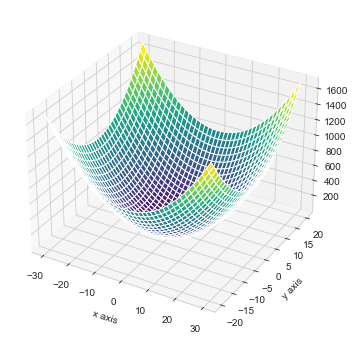

In [11]:
x = np.linspace(-30, 30, 40)
y = np.linspace(-20, 20, 40)
x, y = np.meshgrid(x, y)
z = f1((x, y))

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
plt.xlabel("x axis")
plt.ylabel("y axis")
ax.plot_surface(x, y, z, cmap="viridis")
plt.show()

In [13]:
D = SGD(f1, (10.0, 8.0), 0.1, Method="Piece")
piecex, piecefx, pieceLR = D["x"], D["f(x)"], D["Learning Rate"]
D.head()

,x,f(x),Learning Rate
0,"(10.0, 8.0)",228.000000,0.1
1,"[8.142953007059123, 4.624641171318045]",109.082296,0.1
2,"[6.6573153, 2.5994258]",57.833875,0.1
3,"[5.4688053, 1.3842965]",33.740385,0.1
4,"[4.5179973, 0.6552191]",21.270923,0.1


In [14]:
D = SGD(f1, (10.0, 8.0), 0.1, Method="Exp")
expx, expfx, expLR = D["x"], D["f(x)"], D["Learning Rates"]
D.head()

,x,f(x),Learning Rates
0,"[10.0, 8.0]",228.000000,0.100000
1,"[8.12727575450164, 5.122876224700896]",118.540333,0.090484
2,"[6.739416, 3.461783]",69.387612,0.081873
3,"[5.689259, 2.4509907]",44.382379,0.074082
4,"[4.879826, 1.8074099]",30.346163,0.067032


In [17]:
D = SGD(f1, (10.0, 8.0), 0.1,Method="Poly")
polyx, polyfx, polyLR = D["x"], D["f(x)"], D["Learning Rates"]
D.head()

,x,f(x),Learning Rates
0,"(10.0, 8.0)",228.000000,0.100000
1,"[7.8611101642583705, 4.9167153993430865]",110.145234,0.097590
2,"[6.2197995, 3.1244981]",58.210883,0.093048
3,"[4.9740963, 2.075276]",33.355174,0.086768
4,"[4.0342693, 1.449899]",20.479743,0.079208


In [18]:
D = SGD(f1, (10.0, 8.0), 0.1,0.9, Method="Momentum")
momx, momfx, momLR = D["x"], D["f(x)"], D["Learning Rates"]
D.head()

,x,f(x),Learning Rates
0,"(10.0, 8.0)",228.000000,0.1
1,"[8.0, 4.799999952316284]",110.079999,0.1
2,"[6.4, 2.88]",57.548803,0.1
3,"[5.12, 1.728]",32.186367,0.1
4,"[4.0959997, 1.0368]",18.927122,0.1


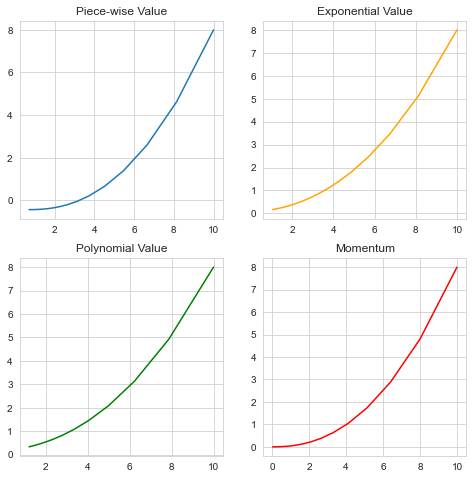

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(221)

plt.title("Piece-wise Value")
plt.plot([x[0] for x in piecex], [x[1] for x in piecex])

plt.subplot(222)
plt.title("Exponential Value")
plt.plot([x[0] for x in expx], [x[1] for x in expx], 'orange')

plt.subplot(223)
plt.title("Polynomial Value")
plt.plot([x[0] for x in polyx], [x[1] for x in polyx], 'green')

plt.subplot(224)
plt.title("Momentum")
plt.plot([x[0] for x in momx], [x[1] for x in momx], 'red')
plt.show()

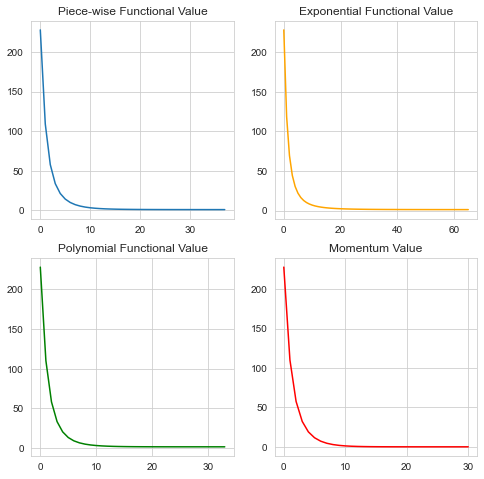

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(221)

plt.title("Piece-wise Functional Value")
plt.plot(piecefx)

plt.subplot(222)
plt.title("Exponential Functional Value")
plt.plot(expfx, 'orange')

plt.subplot(223)
plt.title("Polynomial Functional Value")
plt.plot(polyfx, 'green')

plt.subplot(224)
plt.title("Momentum Value")
plt.plot(momfx,'red')
plt.show()

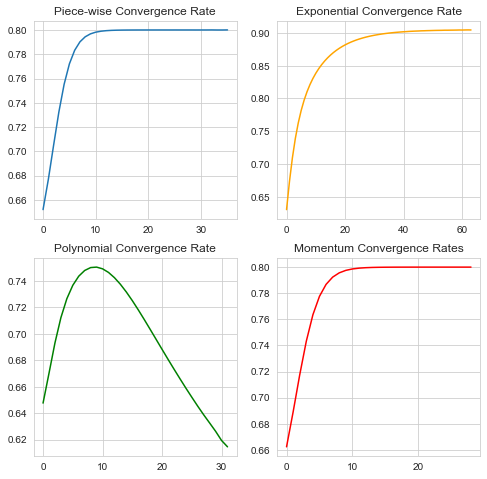

In [21]:
plt.figure(figsize=(8, 8))
plt.subplot(221)

plt.title("Piece-wise Convergence Rate")
plt.plot(convergence_rate(piecex))

plt.subplot(222)
plt.title("Exponential Convergence Rate")
plt.plot(convergence_rate(expx), 'orange')

plt.subplot(223)
plt.title("Polynomial Convergence Rate")
plt.plot(convergence_rate(polyx), 'green')

plt.subplot(224)
plt.title("Momentum Convergence Rates")
plt.plot(convergence_rate(momx),"red")
plt.show()

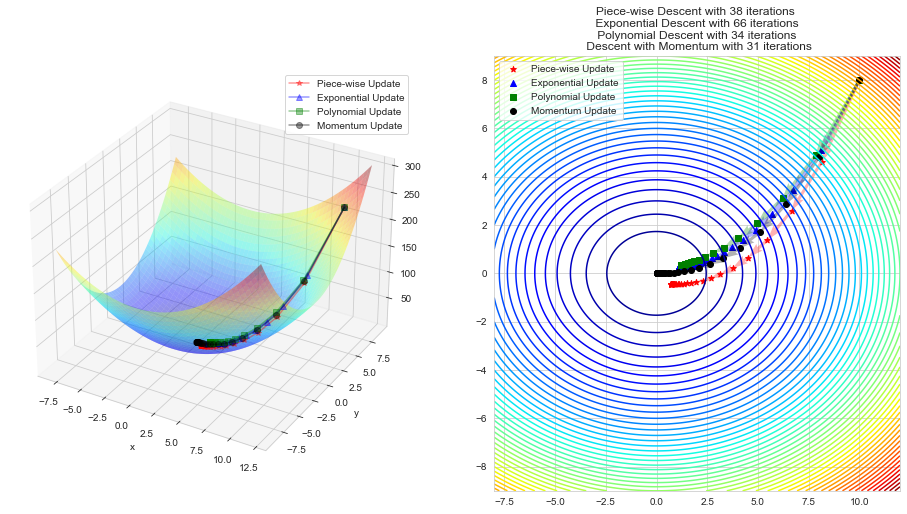

In [23]:
xs, ys = np.array([x[0] for x in piecex]), np.array([x[1] for x in piecex])
xse, yse = np.array([x[0] for x in expx]), np.array([x[1] for x in expx])
xsp, ysp = np.array([x[0] for x in polyx]), np.array([x[1] for x in polyx])
xm,ym = np.array([x[0] for x in momx]), np.array([x[1] for x in momx])

x = np.linspace(-8, 12, 250)
y = np.linspace(-9, 9, 250)
X, Y = np.meshgrid(x, y)
Z = f1((X, Y))

anglesx = xs[1:] - xs[:-1]
anglesy = ys[1:] - ys[:-1]

anglesxe = xse[1:] - xse[:-1]
anglesye = yse[1:] - yse[:-1]

anglesxp = xsp[1:] - xsp[:-1]
anglesyp = ysp[1:] - ysp[:-1]

anglesxm = xm[1:] - xm[:-1]
anglesym = ym[1:] - ym[:-1]

fig = plt.figure(figsize=(16, 8))

# Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,
                Y,
                Z,
                rstride=5,
                cstride=5,
                cmap='jet',
                alpha=.4,
                edgecolor='none')
ax.plot(xs,
        ys,
        f1((xs, ys)),
        color='r',
        marker='*',
        alpha=.4,
        label="Piece-wise Update")
ax.plot(xse,
        yse,
        f1((xse, yse)),
        color='b',
        marker='^',
        alpha=.4,
        label="Exponential Update")
ax.plot(xsp,
        ysp,
        f1((xsp, ysp)),
        color='g',
        marker='s',
        alpha=.4,
        label="Polynomial Update")
ax.plot(xm,
        ym,
        f1((xm, ym)),
        color='black',
        marker='o',
        alpha=.4,
        label="Momentum Update")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, 50, cmap='jet')
# Plotting the iterations and intermediate values
ax.scatter(xs, ys, color='r', marker='*', label="Piece-wise Update")
ax.quiver(xs[:-1],
          ys[:-1],
          anglesx,
          anglesy,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)

ax.scatter(xse, yse, color='b', marker='^', label="Exponential Update")
ax.quiver(xse[:-1],
          yse[:-1],
          anglesxe,
          anglesye,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='b',
          alpha=.3)

ax.scatter(xsp, ysp, color='g', marker='s', label="Polynomial Update")
ax.quiver(xsp[:-1],
          ysp[:-1],
          anglesxp,
          anglesyp,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='g',
          alpha=.3)
ax.scatter(xm, ym, color='black', marker='o', label="Momentum Update")
ax.quiver(xm[:-1],
          ym[:-1],
          anglesxm,
          anglesym,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='black',
          alpha=.3)
ax.legend()
ax.set_title(
    'Piece-wise Descent with {} iterations \n Exponential Descent with {} iterations \n Polynomial Descent with {} iterations \n Descent with Momentum with {} iterations'
    .format(len(xs), len(xse), len(xsp),len(xm)))

plt.show()

## $f_{2}(x_{1},x_{2})=x_{1}^2 - 2 x_{2}^2$

In [24]:
def f2(x):
    return x[0]**2 - 2 * (x[1]**2)

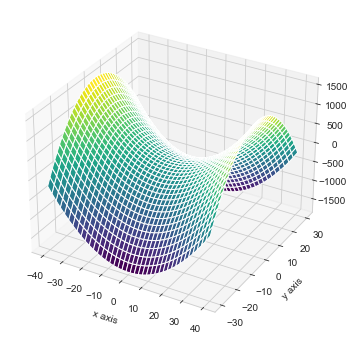

In [28]:
x = np.linspace(-40, 40, 40)
y = np.linspace(-30, 30, 40)
x, y = np.meshgrid(x, y)
z = f2((x, y))

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
plt.xlabel("x axis")
plt.ylabel("y axis")
ax.plot_surface(x, y, z, cmap="viridis")
plt.show()

In [30]:
D = SGD(f2, (1.0, 2.0), 0.1,Method="Piece")
piecex, piecefx, pieceLR = D["x"], D["f(x)"], D["Learning Rate"]
D.head()

,x,f(x),Learning Rate
0,"(1.0, 2.0)",-7.000000,0.1
1,"[0.7316377647847823, 2.8265993874228084]",-15.444034,0.1
2,"[0.516948, 3.9838386]",-31.474704,0.1
3,"[0.34519613, 5.6039734]",-62.689875,0.1
4,"[0.20779467, 7.872162]",-123.898686,0.1


In [31]:
D = SGD(f2, (1.0, 2.0), 0.1,  Method="Exp")
expx, expfx, expLR = D["x"], D["f(x)"], D["Learning Rates"]
D.head()

,x,f(x),Learning Rates
0,"[1.0, 2.0]",-7.000000,0.100000
1,"[0.7398543744202228, 2.654729696499009]",-13.547795,0.090484
2,"[0.54706275, 3.4615724]",-23.665689,0.081873
3,"[0.40118235, 4.4307237]",-39.101677,0.074082
4,"[0.28874165, 5.5675044]",-61.910839,0.067032


In [32]:
D = SGD(f2, (1.0, 2.0), 0.1, Method= "Poly")
polyx, polyfx, polyLR = D["x"], D["f(x)"], D["Learning Rates"]
D.head()

,x,f(x),Learning Rates
0,"(1.0, 2.0)",-7.000000,0.100000
1,"[0.8657256315120181, 2.8445202754720182]",-15.433110,0.097590
2,"[0.7626881, 3.9640641]",-30.845916,0.093048
3,"[0.68448585, 5.3966064]",-57.778201,0.086768
4,"[0.6254858, 7.1582084]",-102.088662,0.079208


In [33]:
D = SGD(f1, (1.0, 2.0), 0.1,0.9, Method="Momentum")
momx, momfx, momLR = D["x"], D["f(x)"], D["Learning Rates"]
D.head()

,x,f(x),Learning Rates
0,"(1.0, 2.0)",9.000000,0.1
1,"[0.7999999970197678, 1.199999988079071]",3.520000,0.1
2,"[0.64, 0.72]",1.446400,0.1
3,"[0.51199996, 0.432]",0.635392,0.1
4,"[0.40959996, 0.2592]",0.302141,0.1


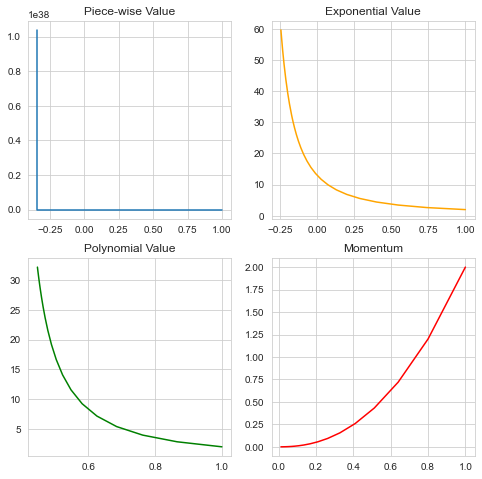

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(221)

plt.title("Piece-wise Value")
plt.plot([x[0] for x in piecex], [x[1] for x in piecex])

plt.subplot(222)
plt.title("Exponential Value")
plt.plot([x[0] for x in expx], [x[1] for x in expx], 'orange')

plt.subplot(223)
plt.title("Polynomial Value")
plt.plot([x[0] for x in polyx], [x[1] for x in polyx], 'green')

plt.subplot(224)
plt.title("Momentum")
plt.plot([x[0] for x in momx], [x[1] for x in momx], 'red')
plt.show()

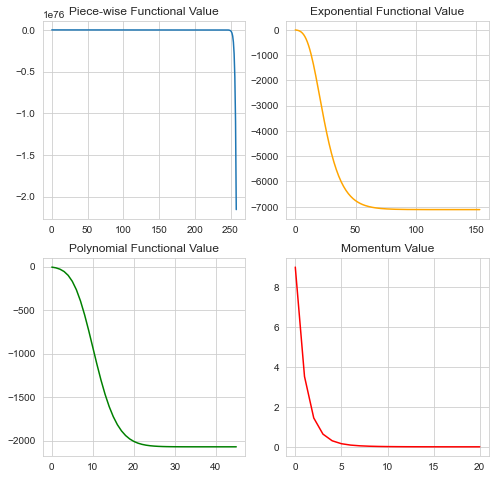

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(221)

plt.title("Piece-wise Functional Value")
plt.plot(piecefx)

plt.subplot(222)
plt.title("Exponential Functional Value")
plt.plot(expfx, 'orange')

plt.subplot(223)
plt.title("Polynomial Functional Value")
plt.plot(polyfx, 'green')

plt.subplot(224)
plt.title("Momentum Value")
plt.plot(momfx,'red')
plt.show()

<ipython-input-2-a6f34237dfac>:4: RuntimeWarning: invalid value encountered in float_scalars
  val = np.linalg.norm(x[i + 1] - x[i]) / np.linalg.norm(x[i] - x[i - 1])
<ipython-input-2-a6f34237dfac>:4: RuntimeWarning: invalid value encountered in subtract
  val = np.linalg.norm(x[i + 1] - x[i]) / np.linalg.norm(x[i] - x[i - 1])


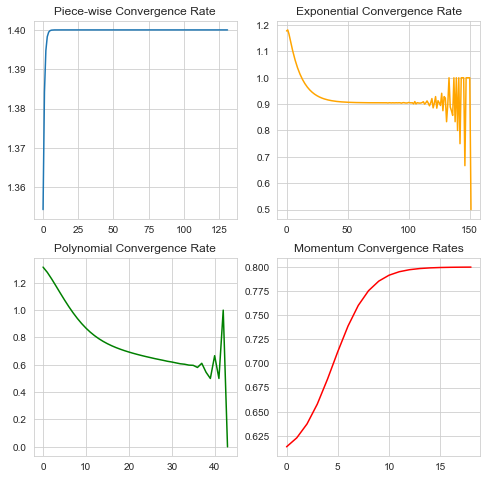

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(221)

plt.title("Piece-wise Convergence Rate")
plt.plot(convergence_rate(piecex))

plt.subplot(222)
plt.title("Exponential Convergence Rate")
plt.plot(convergence_rate(expx), 'orange')

plt.subplot(223)
plt.title("Polynomial Convergence Rate")
plt.plot(convergence_rate(polyx), 'green')

plt.subplot(224)
plt.title("Momentum Convergence Rates")
plt.plot(convergence_rate(momx),"red")
plt.show()

<ipython-input-37-1e902cd5e505>:12: RuntimeWarning: invalid value encountered in subtract
  anglesy = ys[1:] - ys[:-1]
/usr/lib/python3/dist-packages/matplotlib/quiver.py:642: RuntimeWarning: invalid value encountered in subtract
  dxy = xyp - xy
/usr/lib/python3/dist-packages/matplotlib/quiver.py:738: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/usr/lib/python3/dist-packages/matplotlib/quiver.py:751: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


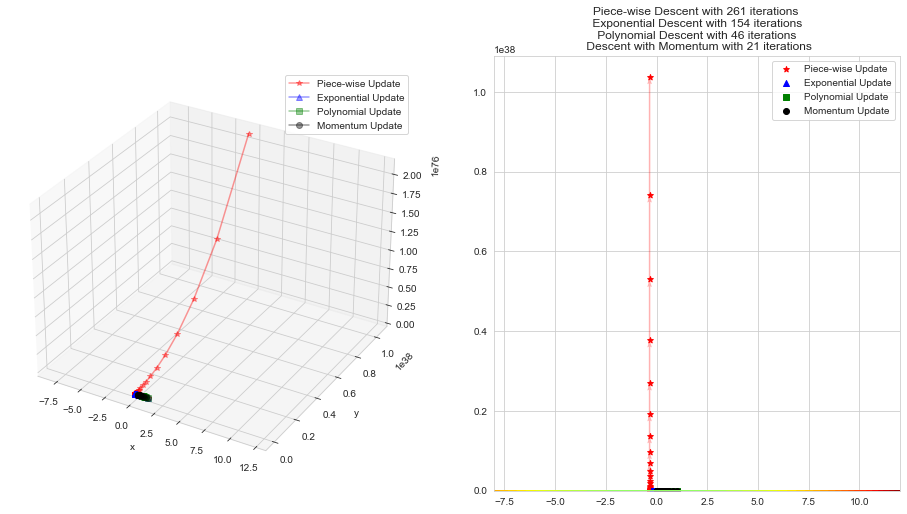

In [37]:
xs, ys = np.array([x[0] for x in piecex]), np.array([x[1] for x in piecex])
xse, yse = np.array([x[0] for x in expx]), np.array([x[1] for x in expx])
xsp, ysp = np.array([x[0] for x in polyx]), np.array([x[1] for x in polyx])
xm,ym = np.array([x[0] for x in momx]), np.array([x[1] for x in momx])

x = np.linspace(-8, 12, 250)
y = np.linspace(-9, 9, 250)
X, Y = np.meshgrid(x, y)
Z = f2((X, Y))

anglesx = xs[1:] - xs[:-1]
anglesy = ys[1:] - ys[:-1]

anglesxe = xse[1:] - xse[:-1]
anglesye = yse[1:] - yse[:-1]

anglesxp = xsp[1:] - xsp[:-1]
anglesyp = ysp[1:] - ysp[:-1]

anglesxm = xm[1:] - xm[:-1]
anglesym = ym[1:] - ym[:-1]

fig = plt.figure(figsize=(16, 8))

# Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,
                Y,
                Z,
                rstride=5,
                cstride=5,
                cmap='jet',
                alpha=.4,
                edgecolor='none')
ax.plot(xs,
        ys,
        f1((xs, ys)),
        color='r',
        marker='*',
        alpha=.4,
        label="Piece-wise Update")
ax.plot(xse,
        yse,
        f1((xse, yse)),
        color='b',
        marker='^',
        alpha=.4,
        label="Exponential Update")
ax.plot(xsp,
        ysp,
        f1((xsp, ysp)),
        color='g',
        marker='s',
        alpha=.4,
        label="Polynomial Update")
ax.plot(xm,
        ym,
        f1((xm, ym)),
        color='black',
        marker='o',
        alpha=.4,
        label="Momentum Update")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, 50, cmap='jet')
# Plotting the iterations and intermediate values
ax.scatter(xs, ys, color='r', marker='*', label="Piece-wise Update")
ax.quiver(xs[:-1],
          ys[:-1],
          anglesx,
          anglesy,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)

ax.scatter(xse, yse, color='b', marker='^', label="Exponential Update")
ax.quiver(xse[:-1],
          yse[:-1],
          anglesxe,
          anglesye,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='b',
          alpha=.3)

ax.scatter(xsp, ysp, color='g', marker='s', label="Polynomial Update")
ax.quiver(xsp[:-1],
          ysp[:-1],
          anglesxp,
          anglesyp,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='g',
          alpha=.3)
ax.scatter(xm, ym, color='black', marker='o', label="Momentum Update")
ax.quiver(xm[:-1],
          ym[:-1],
          anglesxm,
          anglesym,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='black',
          alpha=.3)
ax.legend()
ax.set_title(
    'Piece-wise Descent with {} iterations \n Exponential Descent with {} iterations \n Polynomial Descent with {} iterations \n Descent with Momentum with {} iterations'
    .format(len(xs), len(xse), len(xsp),len(xm)))

plt.show()

<ipython-input-38-e70e6f4fa78b>:15: RuntimeWarning: invalid value encountered in subtract
  anglesy = ys[1:] - ys[:-1]


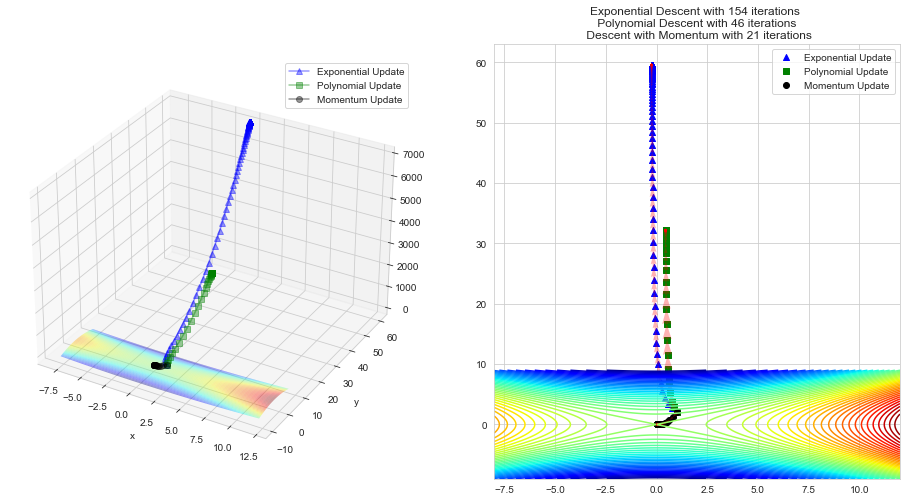

In [38]:
## Seeing without piecewise update


xs, ys = np.array([x[0] for x in piecex]), np.array([x[1] for x in piecex])
xse, yse = np.array([x[0] for x in expx]), np.array([x[1] for x in expx])
xsp, ysp = np.array([x[0] for x in polyx]), np.array([x[1] for x in polyx])
xm,ym = np.array([x[0] for x in momx]), np.array([x[1] for x in momx])

x = np.linspace(-8, 12, 250)
y = np.linspace(-9, 9, 250)
X, Y = np.meshgrid(x, y)
Z = f2((X, Y))

anglesx = xs[1:] - xs[:-1]
anglesy = ys[1:] - ys[:-1]

anglesxe = xse[1:] - xse[:-1]
anglesye = yse[1:] - yse[:-1]

anglesxp = xsp[1:] - xsp[:-1]
anglesyp = ysp[1:] - ysp[:-1]

anglesxm = xm[1:] - xm[:-1]
anglesym = ym[1:] - ym[:-1]

fig = plt.figure(figsize=(16, 8))

# Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,
                Y,
                Z,
                rstride=5,
                cstride=5,
                cmap='jet',
                alpha=.4,
                edgecolor='none')

ax.plot(xse,
        yse,
        f1((xse, yse)),
        color='b',
        marker='^',
        alpha=.4,
        label="Exponential Update")
ax.plot(xsp,
        ysp,
        f1((xsp, ysp)),
        color='g',
        marker='s',
        alpha=.4,
        label="Polynomial Update")
ax.plot(xm,
        ym,
        f1((xm, ym)),
        color='black',
        marker='o',
        alpha=.4,
        label="Momentum Update")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, 50, cmap='jet')
# Plotting the iterations and intermediate values
# ax.scatter(xs, ys, color='r', marker='*', label="Piece-wise Update")
# ax.quiver(xs[:-1],
#           ys[:-1],
#           anglesx,
#           anglesy,
#           scale_units='xy',
#           angles='xy',
#           scale=1,
#           color='r',
#           alpha=.3)

ax.scatter(xse, yse, color='b', marker='^', label="Exponential Update")
ax.quiver(xse[:-1],
          yse[:-1],
          anglesxe,
          anglesye,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)

ax.scatter(xsp, ysp, color='g', marker='s', label="Polynomial Update")
ax.quiver(xsp[:-1],
          ysp[:-1],
          anglesxp,
          anglesyp,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)
ax.scatter(xm, ym, color='black', marker='o', label="Momentum Update")
ax.quiver(xm[:-1],
          ym[:-1],
          anglesxm,
          anglesym,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)
ax.legend()
ax.set_title(
    'Exponential Descent with {} iterations \n Polynomial Descent with {} iterations \n Descent with Momentum with {} iterations'
    .format(len(xse), len(xsp),len(xm)))

plt.show()

<ipython-input-39-f6665ca18c23>:15: RuntimeWarning: invalid value encountered in subtract
  anglesy = ys[1:] - ys[:-1]


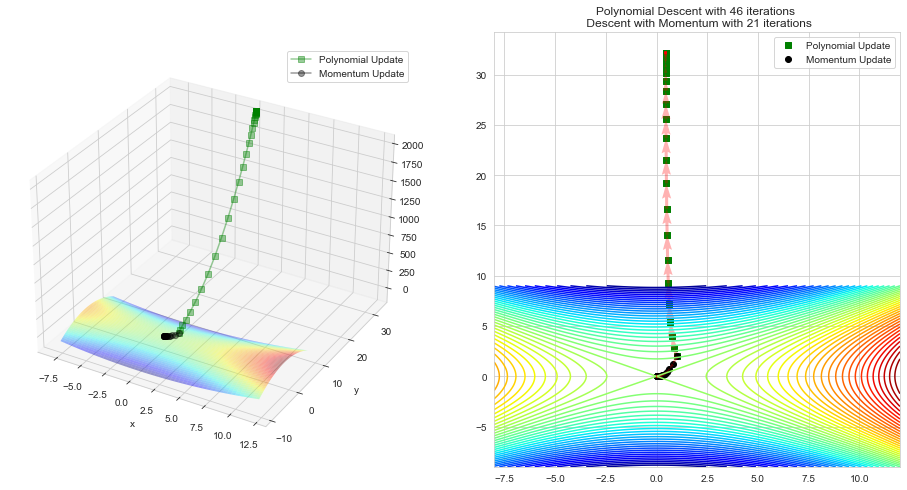

In [39]:
## Seeing without piecewise and exponential update


xs, ys = np.array([x[0] for x in piecex]), np.array([x[1] for x in piecex])
xse, yse = np.array([x[0] for x in expx]), np.array([x[1] for x in expx])
xsp, ysp = np.array([x[0] for x in polyx]), np.array([x[1] for x in polyx])
xm,ym = np.array([x[0] for x in momx]), np.array([x[1] for x in momx])

x = np.linspace(-8, 12, 250)
y = np.linspace(-9, 9, 250)
X, Y = np.meshgrid(x, y)
Z = f2((X, Y))

anglesx = xs[1:] - xs[:-1]
anglesy = ys[1:] - ys[:-1]

anglesxe = xse[1:] - xse[:-1]
anglesye = yse[1:] - yse[:-1]

anglesxp = xsp[1:] - xsp[:-1]
anglesyp = ysp[1:] - ysp[:-1]

anglesxm = xm[1:] - xm[:-1]
anglesym = ym[1:] - ym[:-1]

fig = plt.figure(figsize=(16, 8))

# Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,
                Y,
                Z,
                rstride=5,
                cstride=5,
                cmap='jet',
                alpha=.4,
                edgecolor='none')
ax.plot(xsp,
        ysp,
        f1((xsp, ysp)),
        color='g',
        marker='s',
        alpha=.4,
        label="Polynomial Update")
ax.plot(xm,
        ym,
        f1((xm, ym)),
        color='black',
        marker='o',
        alpha=.4,
        label="Momentum Update")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, 50, cmap='jet')
# Plotting the iterations and intermediate values
ax.scatter(xsp, ysp, color='g', marker='s', label="Polynomial Update")
ax.quiver(xsp[:-1],
          ysp[:-1],
          anglesxp,
          anglesyp,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)
ax.scatter(xm, ym, color='black', marker='o', label="Momentum Update")
ax.quiver(xm[:-1],
          ym[:-1],
          anglesxm,
          anglesym,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)
ax.legend()
ax.set_title(
    'Polynomial Descent with {} iterations \n Descent with Momentum with {} iterations'
    .format(len(xsp),len(xm)))

plt.show()

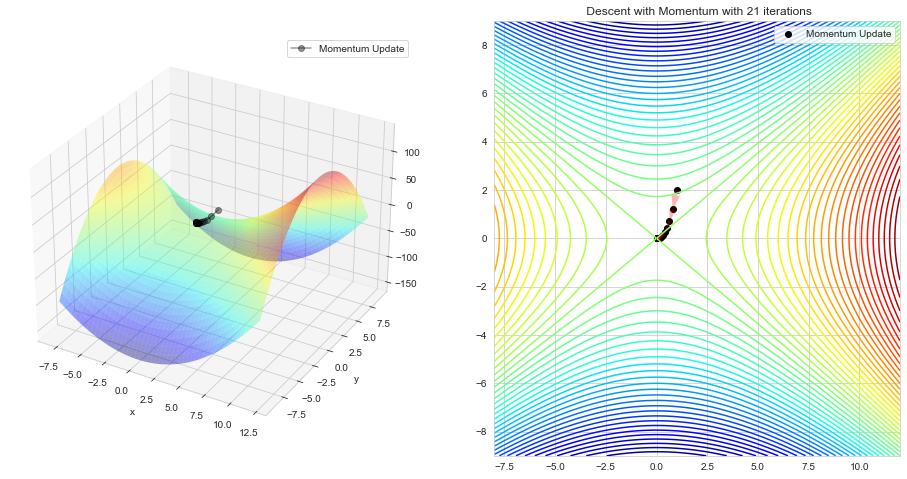

In [40]:
## Seeing only with momentum update

xm,ym = np.array([x[0] for x in momx]), np.array([x[1] for x in momx])

x = np.linspace(-8, 12, 250)
y = np.linspace(-9, 9, 250)
X, Y = np.meshgrid(x, y)
Z = f2((X, Y))


anglesxm = xm[1:] - xm[:-1]
anglesym = ym[1:] - ym[:-1]

fig = plt.figure(figsize=(16, 8))

# Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,
                Y,
                Z,
                rstride=5,
                cstride=5,
                cmap='jet',
                alpha=.4,
                edgecolor='none')
ax.plot(xm,
        ym,
        f1((xm, ym)),
        color='black',
        marker='o',
        alpha=.4,
        label="Momentum Update")
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, Z, 50, cmap='jet')
# Plotting the iterations and intermediate values
ax.scatter(xm, ym, color='black', marker='o', label="Momentum Update")
ax.quiver(xm[:-1],
          ym[:-1],
          anglesxm,
          anglesym,
          scale_units='xy',
          angles='xy',
          scale=1,
          color='r',
          alpha=.3)
ax.legend()
ax.set_title(
    ' Descent with Momentum with {} iterations'
    .format(len(xm)))

plt.show()

Here we can see that only Momentum term was able to deal with non convex function. Although this is not wholesome truth of nature. We will see later how combination of different methods helps.